# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [6]:
# Separate target data from features data and Split in train and Test data (80/20)
df_target = data['MEDV']
df_features = data.drop('MEDV', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [86]:
# Initialize and train a Linear Regression model
lr_model = LinearRegression().fit(X_train, y_train)

# Generating predictions
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

In [105]:
def lm_metrics(metric: str, y_train, y_test, ypred_train, ypred_test):
    
    """
    Computes and prints metrics for machine learning models.

    Args:
        metric (string) _Description_: Name of the metric to be computed (see sklearn.metrics)
        y_train (y trained data)
        y_test (y test data)
        ypred_train (trained predictions)
        ypred_test (test predictions)
    """

    # Define accepted metrics
    metrics = {
        "r-squared score": r2_score,
        "mean squared error": mean_squared_error,
        "mean absolute error": mean_absolute_error,
        "accuracy score": accuracy_score,
        "balanced accuracy score": balanced_accuracy_score,
        "precision score": precision_score,
        "recall score": recall_score,
        "f1 score": f1_score
    }
    
    # Check if metric is valid
    if metric not in metrics:
        raise ValueError(f"Invalid metric: {metric}")
    
    # Compute and print the metric result
    if metric == "precision score" or metric == "recall score" or metric == "f1 score":
        score_train = metrics[metric](y_train, ypred_train, average="weighted")
        score_test = metrics[metric](y_test, ypred_test, average="weighted")
    else:
        score_train = metrics[metric](y_train, ypred_train)
        score_test = metrics[metric](y_test, ypred_test)
    
    print(f"{metric}:\nTrain data:\t{score_train}\nTest data:\t{score_test}")

## 3. Calculate and print R-squared for both the training and the testing set.

In [91]:
# Compute and print R-squared Score
lm_metrics("r-squared score", y_train, y_test, y_pred_train, y_pred_test)

r-squared score:
Train data:	0.9216908816686615
Test data:	0.9625562925454857


## 4. Calculate and print mean squared error for both the training and the testing set.

In [92]:
# Compute and print Mean Squared Error
lm_metrics("mean squared error", y_train, y_test, y_pred_train, y_pred_test)

mean squared error:
Train data:	0.051548064768247005
Test data:	0.02616899109876614


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [94]:
# Compute and print Mean Absolute Error
lm_metrics("mean absolute error", y_train, y_test, y_pred_train, y_pred_test)

mean absolute error:
Train data:	0.1766539913031001
Test data:	0.12374831656967752


## Classification Model Evaluation

In [57]:
from sklearn.datasets import load_iris
data = load_iris()

In [46]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [47]:
column_names = data.feature_names

In [48]:
df = pd.DataFrame(data['data'],columns=column_names)

In [49]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
target = pd.DataFrame(data.target)

In [51]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [52]:
data['target_names']
# 0 = setosa, 1 = versicolor, 2 = virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [95]:
# Split in train and Test data (80/20)
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [96]:
# Initialize and train the Logistic Regression model
lr_iris_model = LogisticRegression().fit(X_train, y_train)
ypred_train = lr_iris_model.predict(X_train)
ypred_test = lr_iris_model.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [98]:
# Compute and print the Accuracy Score
lm_metrics("accuracy score", y_train, y_test, ypred_train, ypred_test)

accuracy score:
Train data:	0.9916666666666667
Test data:	0.9333333333333333


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [100]:
# Compute and print the Balanced Accuracy Score
lm_metrics("balanced accuracy score", y_train, y_test, ypred_train, ypred_test)

balanced accuracy score:
Train data:	0.9914529914529915
Test data:	0.9393939393939394


## 10. Calculate and print the precision score for both the training and the testing set.

In [103]:
# Compute and print the Precision Score
lm_metrics("precision score", y_train, y_test, ypred_train, ypred_test)

precision score:
Train data:	0.9918803418803418
Test data:	0.9428571428571428


## 11. Calculate and print the recall score for both the training and the testing set.

In [106]:
# Compute and print the Recall Score
lm_metrics("recall score", y_train, y_test, ypred_train, ypred_test)

recall score:
Train data:	0.9916666666666667
Test data:	0.9333333333333333


## 12. Calculate and print the F1 score for both the training and the testing set.

In [107]:
# Compute and print the F1 Score
lm_metrics("f1 score", y_train, y_test, ypred_train, ypred_test)

f1 score:
Train data:	0.9916666666666667
Test data:	0.9325641025641025


## 13. Generate confusion matrices for both the training and the testing set.

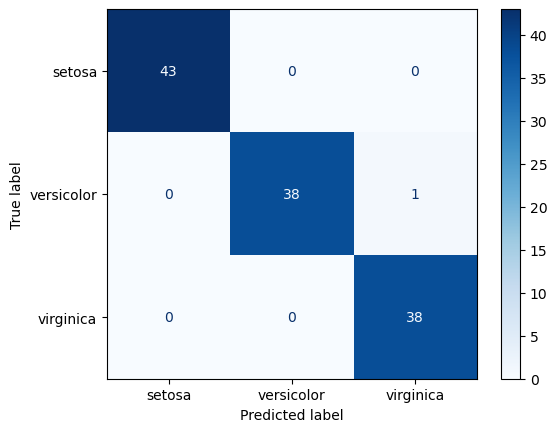

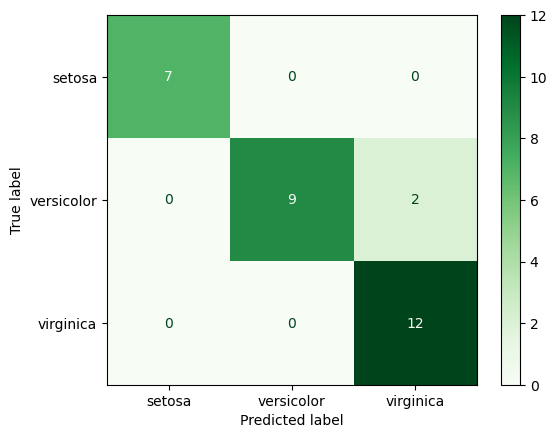

In [140]:
ConfusionMatrixDisplay.from_predictions(y_train, ypred_train, display_labels=data['target_names'],cmap='Blues')
ConfusionMatrixDisplay.from_predictions(y_test, ypred_test, display_labels=data['target_names'], cmap='Greens')

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [163]:
### HOUSING DATA ###
from sklearn.neighbors import KNeighborsRegressor

# Split in train and Test data (80/20)
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2)

# Initialize and train the model
knc_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

# Generating predictions
y_pred_test = knc_model.predict(X_test)
y_pred_train = knc_model.predict(X_train)

# Compute and print metrics
lm_metrics("r-squared score", y_train, y_test, y_pred_train, y_pred_test)
lm_metrics("mean squared error", y_train, y_test, y_pred_train, y_pred_test)
lm_metrics("mean absolute error", y_train, y_test, y_pred_train, y_pred_test)

r-squared score:
Train data:	0.7200855955169014
Test data:	0.4488772955624756
mean squared error:
Train data:	24.486391089108913
Test data:	39.044094117647056
mean absolute error:
Train data:	3.4186633663366335
Test data:	4.348235294117647


r-squared score:
Train data:	0.9348887683125339
Test data:	0.9548872180451128
mean squared error:
Train data:	0.041666666666666664
Test data:	0.03333333333333333
mean absolute error:
Train data:	0.041666666666666664
Test data:	0.03333333333333333
accuracy score:
Train data:	0.9583333333333334
Test data:	0.9666666666666667
balanced accuracy score:
Train data:	0.9597277368122518
Test data:	0.9629629629629629
precision score:
Train data:	0.9598493516399694
Test data:	0.9708333333333333
recall score:
Train data:	0.9583333333333334
Test data:	0.9666666666666667
f1 score:
Train data:	0.9582444412838382
Test data:	0.9667973856209149


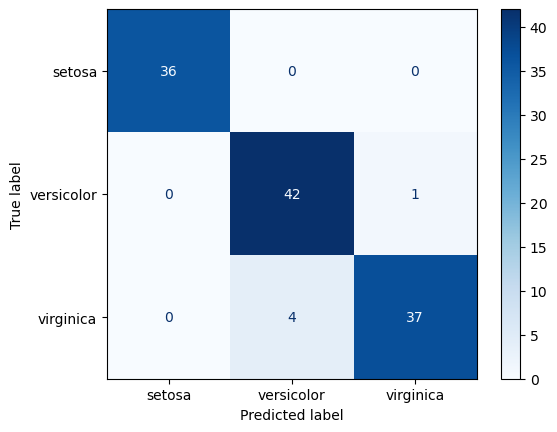

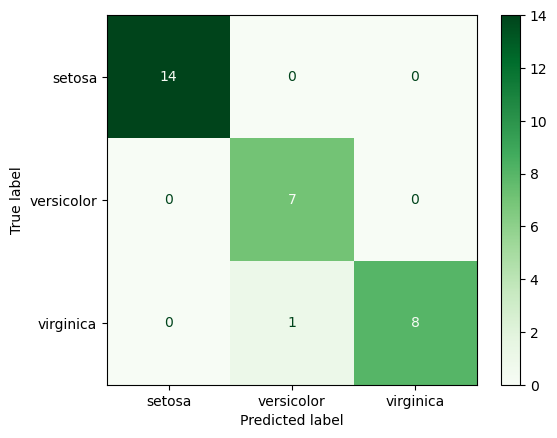

In [145]:
### IRIS DATA ###
from sklearn.tree import DecisionTreeClassifier

# Split in train and Test data (80/20)
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

# Initialize and train the model
dt_model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

# Generating predictions
y_pred_test = dt_model.predict(X_test)
y_pred_train = dt_model.predict(X_train)

# Compute and print metrics
lm_metrics("r-squared score", y_train, y_test, y_pred_train, y_pred_test)
lm_metrics("mean squared error", y_train, y_test, y_pred_train, y_pred_test)
lm_metrics("mean absolute error", y_train, y_test, y_pred_train, y_pred_test)
lm_metrics("accuracy score", y_train, y_test, y_pred_train, y_pred_test)
lm_metrics("balanced accuracy score", y_train, y_test, y_pred_train, y_pred_test)
lm_metrics("precision score", y_train, y_test, y_pred_train, y_pred_test)
lm_metrics("recall score", y_train, y_test, y_pred_train, y_pred_test)
lm_metrics("f1 score", y_train, y_test, y_pred_train, y_pred_test)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, display_labels=data['target_names'],cmap='Blues')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, display_labels=data['target_names'], cmap='Greens')